In [3]:
from skimage.feature import hog
from skimage.io import imread
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import os
%matplotlib inline

# Parameters and Configs

In [4]:
pos_pre = './source/images/pos_ori/'
neg_pre = './source/images/neg_ori/'
pos_aft = './source/images/pos/'
neg_aft = './source/images/neg/'

In [5]:
poss=[pos_pre+x for x in os.listdir(pos_pre) if not x.startswith('.')]
negs=[neg_pre+x for x in os.listdir(neg_pre) if not x.startswith('.')]

# Sample Images

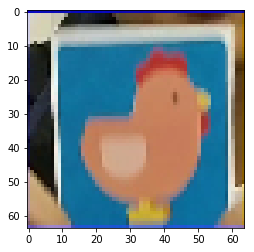

In [6]:
poss[:10]
img=Image.open(poss[0])
img=img.resize((64,64))
imshow(np.asarray(img))

# Processing

In [7]:
def resize_by_short(img, short_len=64):
    """按照短边进行所需比例缩放"""
    (x, y) = img.size
    if x>y:
        y_s=short_len
        x_s=int(x*y_s/y)
        x_l=int(x_s/2)-int(short_len/2)
        x_r=int(x_s/2)+int(short_len/2)
        img = img.resize((x_s, y_s))
        box = (x_l, 0, x_r, short_len)
        img = img.crop(box)
    else:
        x_s=short_len
        y_s=int(y*x_s/x)
        y_l=int(y_s/2)-int(short_len/2)
        y_r=int(y_s/2)+int(short_len/2)
        img = img.resize((x_s, y_s))
        box = (0, y_l, short_len, y_r)
        img = img.crop(box)
    return img

In [8]:
sizes_pos=[]
for img_name in poss:
    img = Image.open(img_name)
    sizes_pos.append(img.size)
    img=img.resize((64,64))
    img.save(pos_aft + os.path.split(img_name)[1])

In [9]:
sizes_neg=[]
for img_name in negs:
    img = Image.open(img_name)
    sizes_neg.append(img.size)
    img=resize_by_short(img)
    img.save(neg_aft + os.path.split(img_name)[1])